## Time-series

* https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

In [13]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import sys
p = os.path.join(os.path.dirname('__file__'), '..')
sys.path.append(p)
import seaborn; seaborn.set()
from common import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Data

In [9]:
data = pd.read_csv('../data/FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [10]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

In [11]:
data.dropna().describe()

,West,East,Total
count,47392.000000,47392.00000,47392.000000
mean,54.750739,54.95801,109.708748
std,73.259235,79.62978,138.790226
min,0.000000,0.00000,0.000000
25%,7.000000,7.00000,15.000000
50%,29.000000,28.00000,59.000000
75%,72.000000,67.00000,143.000000
max,854.000000,717.00000,1165.000000


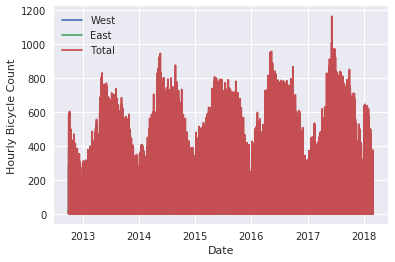

In [14]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

### Resampling

In [41]:
"""goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');
""";

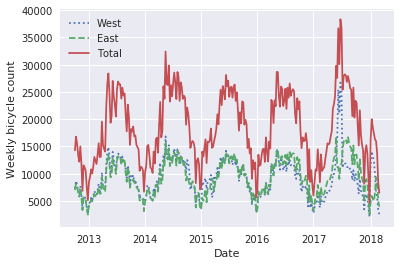

In [15]:
# The hourly data points are too dense
# Lets resample to the SUM over WEEK
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

### Rolling Windows

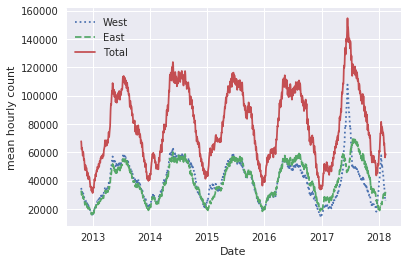

In [17]:
# 30 day rolling mean of our data
# making sure to center the window?

daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

In [21]:
# Gaussian-weighted mean
# Weight nearby observations more than distant observations

"""
The jaggedness of the result is due to the hard cutoff of the window. We can get a smoother version of a rolling mean using a window function–for example, a Gaussian window. The following code specifies both the width of the window (we chose 50 days) and the width of the Gaussian within the window (we chose 10 days):
""";

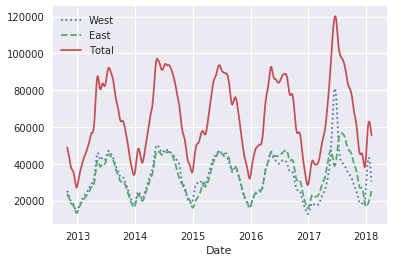

In [22]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

### Aggregations

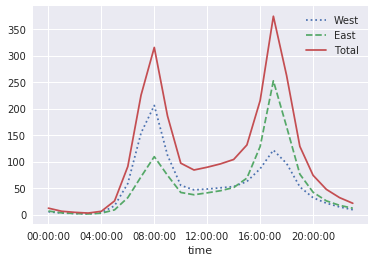

In [24]:
# Get the mean values over a typical day
# Output is strongly bimodal with peaks at beginning/end of day
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

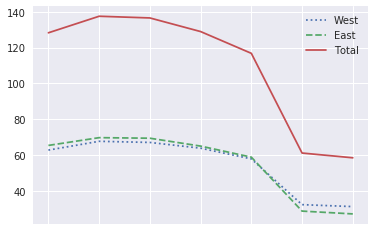

In [26]:
# How things change by day of week
# Pandas datetime columns have lots of interesting ways to split
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

/home/bfortuner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


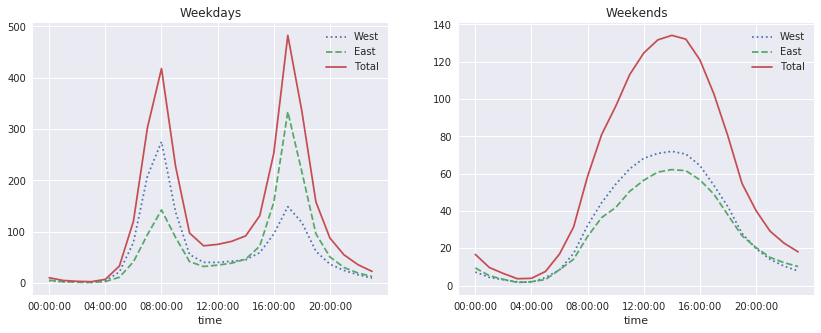

In [28]:
# Weekend vs Weekday

weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);

### Date types

In [30]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [31]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [32]:
# Create a sequence of dates
date = np.array('2015-07-05', dtype=np.datetime64)
mydates = np.arange(12) + date
mydates

array(['2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
       '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12',
       '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16'],
      dtype='datetime64[D]')

In [33]:
# Add time delta to date
date = pd.to_datetime("4th of July, 2015")
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [34]:
# Convert date strings and python datetimes to Pandas dates
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [35]:
# Create a date range
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [36]:
# Create a daterange of n periods with f frequency
pd.date_range('2015-07-03', periods=8, freq='6H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 06:00:00',
               '2015-07-03 12:00:00', '2015-07-03 18:00:00',
               '2015-07-04 00:00:00', '2015-07-04 06:00:00',
               '2015-07-04 12:00:00', '2015-07-04 18:00:00'],
              dtype='datetime64[ns]', freq='6H')

### Date Queries

In [37]:
# Query Dates
mydates[mydates > np.datetime64('2015-07-11')]

array(['2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15',
       '2015-07-16'], dtype='datetime64[D]')

In [38]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [39]:
# Grab date slice
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [40]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

### Shifting

### Backfilling

In [29]:
# forward/backfill missing timesteps

In [ ]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);